## Lift Chart

In [51]:
import pandas as pd
import numpy as np

file_name = "../datasets/lift_data.csv"

data = pd.read_csv(file_name)

data

,Instance,Actual Class,Predicted Class
0,1,0.0,0.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,0.0,0.0
4,5,0.0,0.0
...,...,...,...
7170,7171,1.0,0.0
7171,7172,0.0,0.0
7172,7173,0.0,0.0
7173,7174,0.0,0.0


In [52]:
data.sort_values(by=['Predicted Class'], inplace=True, ascending=False)

data = data.reset_index(drop=True)

data

,Instance,Actual Class,Predicted Class
0,5740,1.0,1.0
1,1292,1.0,1.0
2,5965,0.0,1.0
3,6812,1.0,1.0
4,1289,1.0,1.0
...,...,...,...
7170,2468,0.0,0.0
7171,2467,1.0,0.0
7172,2466,0.0,0.0
7173,2465,0.0,0.0


In [53]:
sorted_input = pd.DataFrame(columns=['Number of Mails Sent', 'Number of Mails Responded'])

for i in range(len(data)):
    sum = data.loc[i, "Actual Class"]
    for j in range(0, i):
        sum += data.loc[j, "Actual Class"]
    sorted_input = sorted_input.append({'Number of Mails Sent': i + 1, 'Number of Mails Responded': sum}, ignore_index=True)

print(sorted_input)

      Number of Mails Sent  Number of Mails Responded
0                      1.0                        1.0
1                      2.0                        2.0
2                      3.0                        2.0
3                      4.0                        3.0
4                      5.0                        4.0
...                    ...                        ...
7170                7171.0                     1235.0
7171                7172.0                     1236.0
7172                7173.0                     1236.0
7173                7174.0                     1236.0
7174                7175.0                     1236.0

[7175 rows x 2 columns]


In [54]:
sorted_input.to_csv(index = False, path_or_buf = '../datasets/sorted_input.csv')

In [55]:
shuffled_data = data.iloc[np.random.permutation(data.index)].reset_index(drop=True)

rand_input = pd.DataFrame(columns=['Number of Mails Sent', 'Number of Mails Responded'])

for i in range(len(shuffled_data)):
    sum = shuffled_data.loc[i, "Actual Class"]
    for j in range(0, i):
        sum += shuffled_data.loc[j, "Actual Class"]
    rand_input = rand_input.append({'Number of Mails Sent': i + 1, 'Number of Mails Responded': sum}, ignore_index=True)

print(rand_input)

      Number of Mails Sent  Number of Mails Responded
0                      1.0                        0.0
1                      2.0                        0.0
2                      3.0                        0.0
3                      4.0                        0.0
4                      5.0                        0.0
...                    ...                        ...
7170                7171.0                     1235.0
7171                7172.0                     1235.0
7172                7173.0                     1235.0
7173                7174.0                     1235.0
7174                7175.0                     1236.0

[7175 rows x 2 columns]


In [56]:
rand_input.to_csv(index = False, path_or_buf = '../datasets/rand_input.csv')

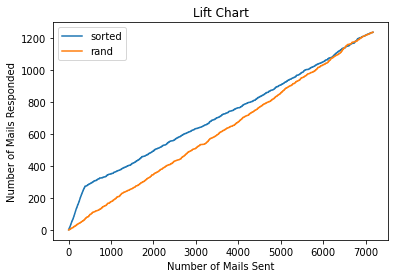

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(sorted_input['Number of Mails Sent'], sorted_input['Number of Mails Responded'], label="sorted")
plt.plot(rand_input['Number of Mails Sent'], rand_input['Number of Mails Responded'], label="rand")
plt.title("Lift Chart")
plt.xlabel('Number of Mails Sent')
plt.ylabel('Number of Mails Responded')
plt.legend()
plt.show()

## Cost - Benefit Analysis

In [81]:
cost = 4
benefit = 15
cost_benefit_of_mails = pd.DataFrame(columns=['Number of Mails Sent', 'Benefit'])

for i in range(len(data)):
    net_benefit = (15 * sorted_input.loc[i, "Number of Mails Responded"]) - (4 * sorted_input.loc[i, "Number of Mails Sent"])
    cost_benefit_of_mails = cost_benefit_of_mails.append({'Number of Mails Sent': i + 1, 'Benefit': net_benefit}, ignore_index=True)

print(cost_benefit_of_mails)

      Number of Mails Sent  Benefit
0                      1.0     11.0
1                      2.0     22.0
2                      3.0     18.0
3                      4.0     29.0
4                      5.0     40.0
...                    ...      ...
7170                7171.0 -10159.0
7171                7172.0 -10148.0
7172                7173.0 -10152.0
7173                7174.0 -10156.0
7174                7175.0 -10160.0

[7175 rows x 2 columns]


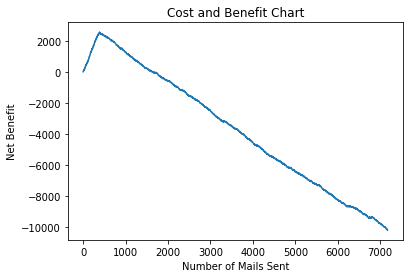

In [82]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(cost_benefit_of_mails['Number of Mails Sent'], cost_benefit_of_mails['Benefit'])
plt.title("Cost and Benefit Chart")
plt.xlabel('Number of Mails Sent')
plt.ylabel('Net Benefit')
plt.show()

In [83]:
maxes = cost_benefit_of_mails.max()
print("Maximum Benefit: ", maxes[1])

index = cost_benefit_of_mails.index[cost_benefit_of_mails['Benefit'] == maxes[1]].tolist()
print("Number of mails sent corresponding to maximum benefit: ", index[0] + 1)


Maximum Benefit:  2550.0
Number of mails sent corresponding to maximum benefit:  390


In [84]:
cost = 4
benefit = 15
cost_benefit_of_mails = pd.DataFrame(columns=['Number of Mails Sent', 'Benefit'])

for i in range(len(data)):
    net_benefit = (15 * rand_input.loc[i, "Number of Mails Responded"]) - (4 * rand_input.loc[i, "Number of Mails Sent"])
    cost_benefit_of_mails = cost_benefit_of_mails.append({'Number of Mails Sent': i + 1, 'Benefit': net_benefit}, ignore_index=True)

print(cost_benefit_of_mails)

      Number of Mails Sent  Benefit
0                      1.0     -4.0
1                      2.0     -8.0
2                      3.0    -12.0
3                      4.0    -16.0
4                      5.0    -20.0
...                    ...      ...
7170                7171.0 -10159.0
7171                7172.0 -10163.0
7172                7173.0 -10167.0
7173                7174.0 -10171.0
7174                7175.0 -10160.0

[7175 rows x 2 columns]


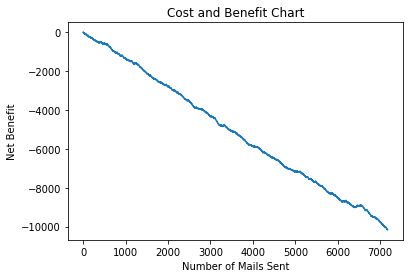

In [85]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(cost_benefit_of_mails['Number of Mails Sent'], cost_benefit_of_mails['Benefit'])
plt.title("Cost and Benefit Chart")
plt.xlabel('Number of Mails Sent')
plt.ylabel('Net Benefit')
plt.show()

In [86]:
maxes = cost_benefit_of_mails.max()
print("Maximum Benefit: ", maxes[1])

index = cost_benefit_of_mails.index[cost_benefit_of_mails['Benefit'] == maxes[1]].tolist()
print("Number of mails sent corresponding to maximum benefit: ", index[0] + 1)


Maximum Benefit:  -4.0
Number of mails sent corresponding to maximum benefit:  1
